In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df = pd.read_json('ultimate_data_challenge.json')

In [155]:
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [156]:
df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [157]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [158]:
last_day = df['last_trip_date'].max()

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [160]:
from datetime import timedelta
last_30_day = last_day - timedelta(days=30)

In [161]:
last_30_day

Timestamp('2014-06-01 00:00:00')

In [162]:
# Marking active if they took a trip in last 30 days.
#1 for active, 0 for not active
df['active'] = [1 if x > last_30_day else 0 for x in df['last_trip_date']]

In [163]:
df['active'].value_counts()/df.shape[0] * 100

0    63.38
1    36.62
Name: active, dtype: float64

Only 36% is active and 63% not active. 

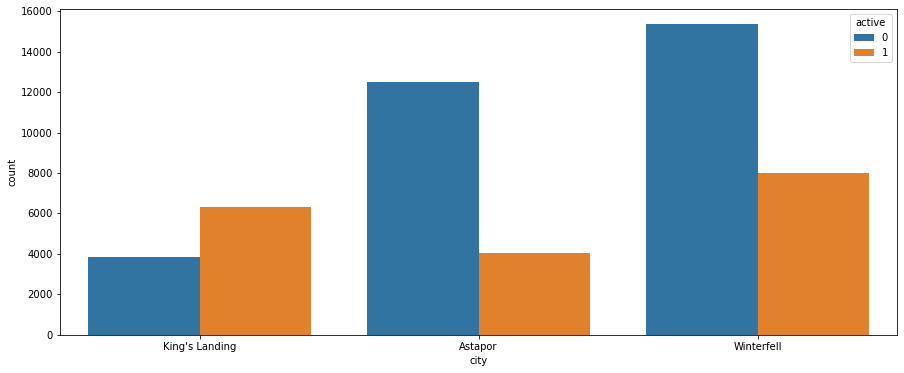

In [164]:
plt.figure(figsize=(15, 6))
sns.countplot(x='city', hue='active', data=df)

City King'sLanding has higher active rides.

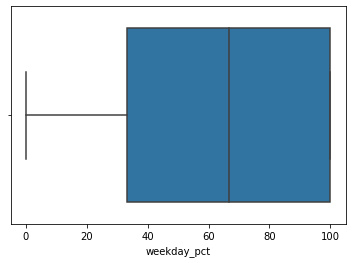

In [165]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='weekday_pct', hue='active', data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD123CA100>]],
      dtype=object)

<Figure size 1080x432 with 0 Axes>

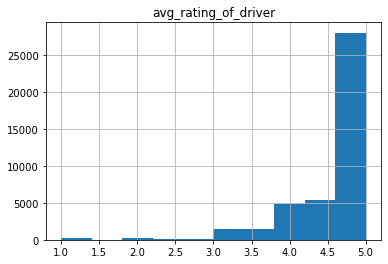

In [166]:
plt.figure(figsize=(15, 6))
df.hist('avg_rating_of_driver')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  active                  50000 non-null  int64 

Null values found in avg_rating_of_driver, phone and avg_rating_by_driver

In [168]:
#We will mark null values its median.
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median())
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median())

In [169]:
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [170]:
# we will update null for phone with majority iphone
df['phone'] = df['phone'].fillna('iphone')

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  active                  50000 non-null  int64 

#### Preprocessing

In [172]:
# we dont need the dates any more
df = df.drop(columns=['signup_date', 'last_trip_date'])

In [173]:
#Dummy encoding for ultimate_black_user
df = pd.get_dummies(df, columns=['ultimate_black_user'], drop_first=True)

In [174]:
#One hot encoding for others
df=pd.get_dummies(df, columns = ['city', 'phone'])

In [175]:
df.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'active', 'ultimate_black_user_True', 'city_Astapor',
       'city_King's Landing', 'city_Winterfell', 'phone_Android',
       'phone_iPhone', 'phone_iphone'],
      dtype='object')

#### Modelling

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

In [177]:
X = df.iloc[:,df.columns!='active']
y=df['active']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [185]:
y.shape

(50000,)

In [186]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

C:\Users\padma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [187]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.75      0.79      9025
           1       0.50      0.66      0.57      3475

    accuracy                           0.72     12500
   macro avg       0.67      0.70      0.68     12500
weighted avg       0.75      0.72      0.73     12500



In [189]:
rc = RandomForestClassifier()
rc.fit(X_train,y_train)
y_pred=rc.predict(X_test)

In [190]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      8023
           1       0.66      0.68      0.67      4477

    accuracy                           0.76     12500
   macro avg       0.74      0.74      0.74     12500
weighted avg       0.76      0.76      0.76     12500



In [193]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)

In [194]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      8310
           1       0.67      0.73      0.70      4190

    accuracy                           0.79     12500
   macro avg       0.76      0.77      0.77     12500
weighted avg       0.79      0.79      0.79     12500



GradientBoostingClassifier is the best.

In [210]:
feature_importance = gb.feature_importances_

14


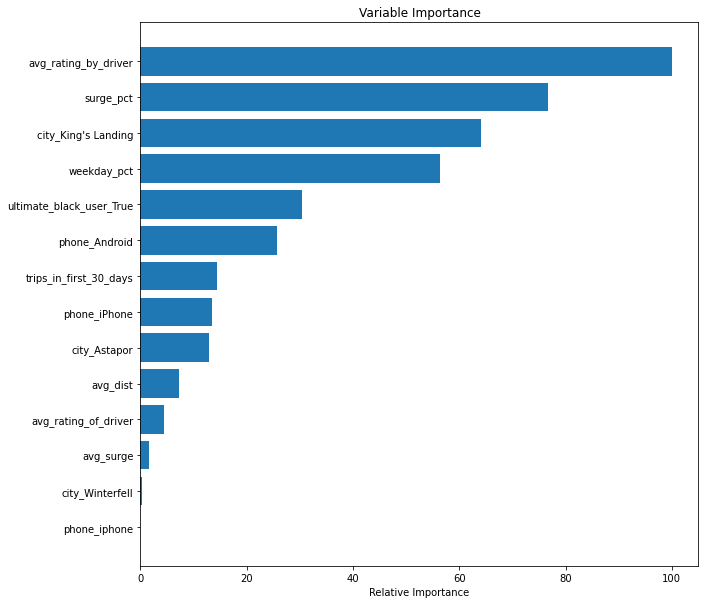

In [219]:
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Above plot show the order of impoprtance of columns